In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from tensorflow.keras import layers,models
from tensorflow import keras

In [6]:
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
valid_dir = '/content/drive/MyDrive/dataset/valid'
IMG_SIZE = (128,128)
BATCH_SIZE = 32

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  label_mode=None,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  shuffle=True,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode=None,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

# valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     valid_dir,
#     label_mode=None,
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     shuffle=True,
# )

Found 5413 files.
Found 819 files.


In [9]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x:(normalization_layer(x),normalization_layer(x)),num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x: (normalization_layer(x),normalization_layer(x)),num_parallel_calls=tf.data.AUTOTUNE)

In [11]:
encoder = models.Sequential([
    layers.InputLayer(input_shape=(128,128,3)),
    layers.Conv2D(32,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_normal'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_normal'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(128,kernel_size=3,padding='same',activation='selu',kernel_initializer='lecun_normal'),
    layers.MaxPool2D(pool_size=2),
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
decoder = models.Sequential([
    layers.Conv2DTranspose(64,kernel_size=3,strides=2,padding='same',activation='selu',kernel_initializer='lecun_normal',input_shape=(16,16,128)),
    layers.Conv2DTranspose(32,kernel_size=3,strides=2,padding='same',kernel_initializer='lecun_normal'),
    layers.Conv2DTranspose(3,kernel_size=3,strides=2,padding='same',activation='sigmoid'),
])

In [14]:
conv_ae = models.Sequential([
    encoder,
    decoder,
])

In [16]:
conv_ae.compile(
    loss ='mse',
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
)
checkpiont = keras.callbacks.ModelCheckpoint(
    "best_autoencoder.keras",
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

In [17]:
conv_ae.fit(
    train_ds,
    validation_data=test_ds,
    epochs = 20,
    callbacks=[checkpiont],
)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - loss: 0.0338 
Epoch 1: val_loss improved from inf to 0.00940, saving model to best_autoencoder.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 2428s 14s/step - loss: 0.0338 - val_loss: 0.0094
Epoch 2/20
169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0085
Epoch 2: val_loss improved from 0.00940 to 0.00831, saving model to best_autoencoder.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 3/20
169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0074
Epoch 3: val_loss improved from 0.00831 to 0.00744, saving model to best_autoencoder.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 4/20
169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0069
Epoch 4: val_loss improved from 0.00744 to 0.00701, saving model to best_autoencoder.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 5/20
169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


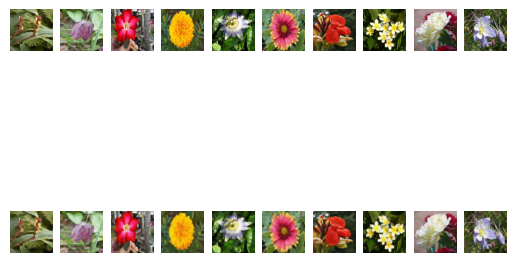

In [22]:
for batch,_ in test_ds.take(1):
    test_images = batch.numpy()
model = keras.models.load_model('best_autoencoder.keras')
reconstructed = model.predict(test_images)
n = 10
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(2, n, n + i + 1)
    plt.imshow(reconstructed[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()